# Importing relevent libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data

In [3]:
raw_data = pd.read_csv('2.01.+Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


# Variables

In [6]:
y = data['Admitted']
x1 = data['SAT']

# Lets plot the data

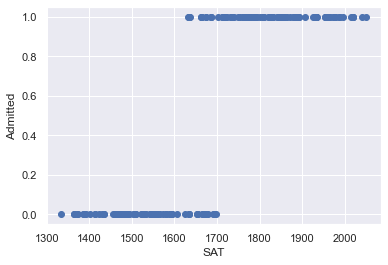

In [8]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()


# Plot with regression line

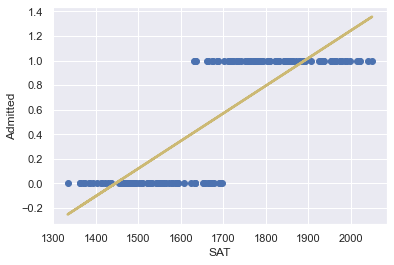

In [10]:
x= sm.add_constant(x1)
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()


plt.scatter(x1,y,color='C0')
y_hat = x1*results_line.params[1] + results_line.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')

plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# No major conclusion from above regression. Now try with logisitc regression


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


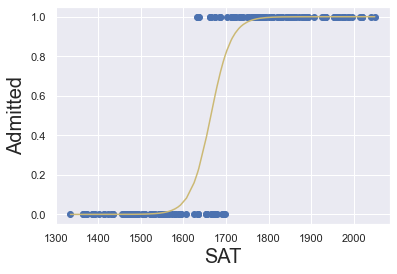

In [13]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0 +x*b1)/(1 + np.exp(b0 + x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()




# The above regression line clearly reflects that 
#1.if sat score is low probablity of getting admission is zero and if score is high probablity getting admisson is 1 means 100%
#2.Uncertinity region is 1600 to 1700. as an instance if you score 1650,you have 50 % chance,with 1700,chance is 0.8=80%

# Building logistic regression with stats model library

In [ ]:
y =data['Admitted']
x1=data['SAT']

# Regression

In [14]:
x =sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log =reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [15]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.7992
Time:                        08:46:24   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Going to take linear approch using log(odds) for predictions

coef =-69.9128
intercept = 0.042

#y =mx +c

log(odds)= 0.042 * SAT -69.9128)

Now consider odds1 and odds1

log(odds2)= 0.042 * SAT2 -69.9128)

-log(odds1)= 0.042 * SAT1 -69.9128)
---------------------------------------------
log(odds2)-lod(odds1) = 0.042(SAT2-SAT1)
log(odds2/odds1) = 0.042(SAT2-SAT1)

difference of 1 unit of SAT:

log(odds2/odds1) = 0.042

odds2/odds1 = e^0.042=1.042
odds2 = 1.042 * odds1 or may be called odds2 is 104.2 % higher than odds1





